In [4]:
import yt
import numpy as np

In [5]:
ds = yt.load_example_frontend_dataset()

yt : [INFO     ] 2016-05-23 13:40:59,208 Example Data: Setting code units
yt : [INFO     ] 2016-05-23 13:40:59,215 Parameters: current_time              = 0
yt : [INFO     ] 2016-05-23 13:40:59,215 Parameters: domain_dimensions         = [30 30 30]
yt : [INFO     ] 2016-05-23 13:40:59,216 Parameters: domain_left_edge          = [ 0.  0.  0.]
yt : [INFO     ] 2016-05-23 13:40:59,217 Parameters: domain_right_edge         = [ 240.  240.  240.]
yt : [INFO     ] 2016-05-23 13:40:59,218 Parameters: cosmological_simulation   = 0


In [6]:
ds.print_stats()

level	# grids	       # cells	     # cells^3
----------------------------------------------
  0	     1	         27000	            30
  1	     1	         27000	            30
  2	     1	         27000	            30
----------------------------------------------
   	     3	         81000


t = 0.00000000e+00 = 0.00000000e+00 s = 0.00000000e+00 years

Smallest Cell:
	Width: 6.482e-25 Mpc
	Width: 6.482e-19 pc
	Width: 1.337e-13 AU
	Width: 2.000e+00 cm


In [7]:
print "left edge"
print ds.index.grid_left_edge
print "right edge"
print ds.index.grid_right_edge

left edge
[[ 0.  0.  0.]
 [ 0.  0.  0.]
 [ 0.  0.  0.]] cm
right edge
[[ 240.  240.  240.]
 [ 120.  120.  120.]
 [  60.   60.   60.]] cm


In [8]:
for g in ds.index.grids:
    print g.LeftEdge,g.RightEdge

[ 0.  0.  0.] cm [ 240.  240.  240.] cm
[ 0.  0.  0.] cm [ 120.  120.  120.] cm
[ 0.  0.  0.] cm [ 60.  60.  60.] cm


In [9]:
slc = yt.SlicePlot(ds,'z','density',center=[120,120,0],width=240)
slc.annotate_grids()
slc.set_log('density',True)
slc.show()

yt : [INFO     ] 2016-05-23 13:40:59,506 xlim = 0.000000 240.000000
yt : [INFO     ] 2016-05-23 13:40:59,508 ylim = 0.000000 240.000000
yt : [INFO     ] 2016-05-23 13:40:59,510 xlim = 0.000000 240.000000
yt : [INFO     ] 2016-05-23 13:40:59,511 ylim = 0.000000 240.000000
yt : [INFO     ] 2016-05-23 13:40:59,514 Making a fixed resolution buffer of (('gas', 'density')) 800 by 800


yt : [INFO     ] 2016-05-23 13:41:00,587 xlim = 0.000000 240.000000
yt : [INFO     ] 2016-05-23 13:41:00,587 ylim = 0.000000 240.000000
yt : [INFO     ] 2016-05-23 13:41:00,589 xlim = 0.000000 240.000000
yt : [INFO     ] 2016-05-23 13:41:00,590 ylim = 0.000000 240.000000
yt : [INFO     ] 2016-05-23 13:41:00,591 Making a fixed resolution buffer of (('gas', 'x')) 800 by 800



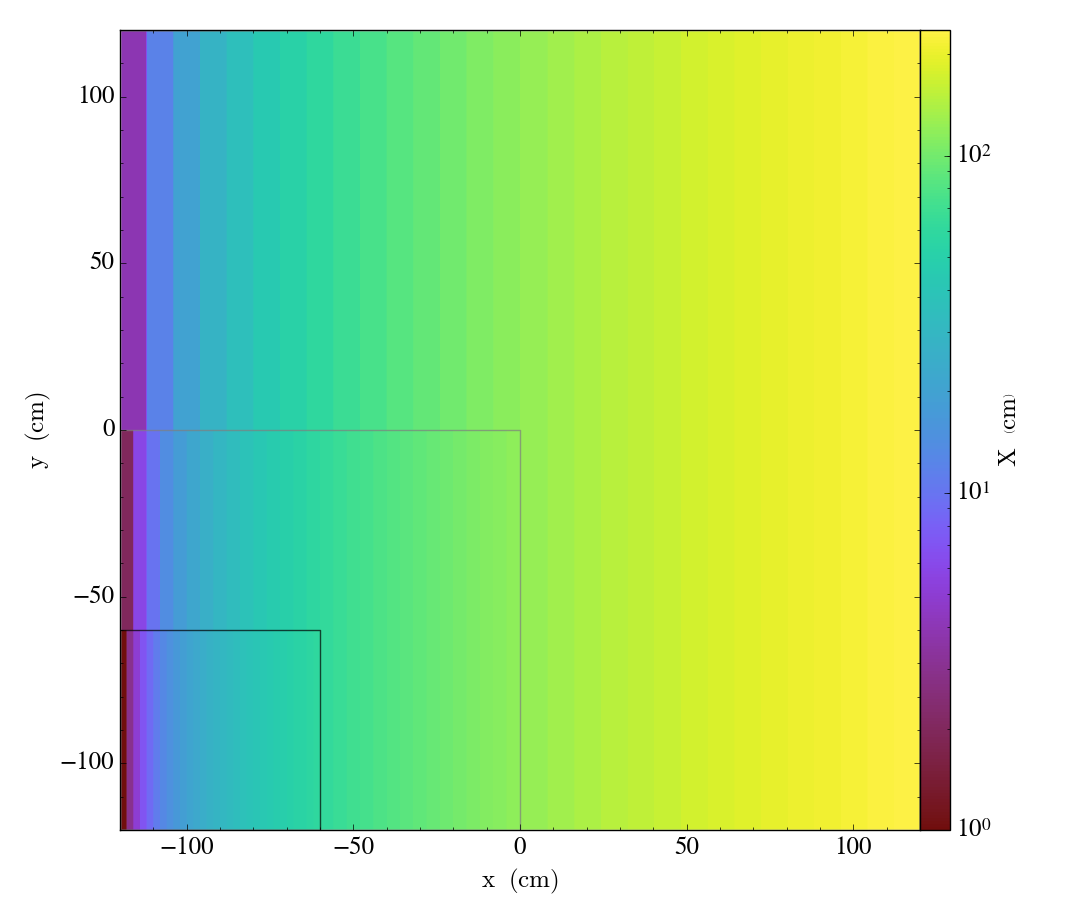

In [10]:
prj = yt.SlicePlot(ds,'z',('gas','x'),center=[120,120,0],width=240)
prj.annotate_grids()
prj.set_log('grid_level',False)
prj.show()

In [11]:
ds.index.grids[0][('index','z')]

YTArray([[[   4.,   12.,   20., ...,  220.,  228.,  236.],
        [   4.,   12.,   20., ...,  220.,  228.,  236.],
        [   4.,   12.,   20., ...,  220.,  228.,  236.],
        ..., 
        [   4.,   12.,   20., ...,  220.,  228.,  236.],
        [   4.,   12.,   20., ...,  220.,  228.,  236.],
        [   4.,   12.,   20., ...,  220.,  228.,  236.]],

       [[   4.,   12.,   20., ...,  220.,  228.,  236.],
        [   4.,   12.,   20., ...,  220.,  228.,  236.],
        [   4.,   12.,   20., ...,  220.,  228.,  236.],
        ..., 
        [   4.,   12.,   20., ...,  220.,  228.,  236.],
        [   4.,   12.,   20., ...,  220.,  228.,  236.],
        [   4.,   12.,   20., ...,  220.,  228.,  236.]],

       [[   4.,   12.,   20., ...,  220.,  228.,  236.],
        [   4.,   12.,   20., ...,  220.,  228.,  236.],
        [   4.,   12.,   20., ...,  220.,  228.,  236.],
        ..., 
        [   4.,   12.,   20., ...,  220.,  228.,  236.],
        [   4.,   12.,   20., ...,  220.

In [12]:
l_units = 'code_length'
rho_units = 'code_mass / code_length**3'
known_other_fields = (
        # Each entry here is of the form
        # ( "name", ("units", ["fields", "to", "alias"], # "display_name")),
        ('density',(rho_units, ['density'],r'$\rho$')),        
    ) + tuple(('GRID::{}'.format(i),(l_units,[i],None)) for i in ('x','y','z'))

In [13]:
known_other_fields

(('density', ('code_mass / code_length**3', ['density'], '$\\rho$')),
 ('GRID::x', ('code_length', ['x'], None)),
 ('GRID::y', ('code_length', ['y'], None)),
 ('GRID::z', ('code_length', ['z'], None)))

In [14]:
ds.derived_field_list

[('example', 'GRID::x'),
 ('example', 'GRID::y'),
 ('example', 'GRID::z'),
 ('example', 'cell_volume'),
 ('example', 'density'),
 ('example', 'dx'),
 ('example', 'dy'),
 ('example', 'dz'),
 ('example', 'path_element_x'),
 ('example', 'path_element_y'),
 ('example', 'path_element_z'),
 ('example', 'vertex_x'),
 ('example', 'vertex_y'),
 ('example', 'vertex_z'),
 ('example', 'x'),
 ('example', 'y'),
 ('example', 'z'),
 ('gas', 'H_nuclei_density'),
 ('gas', 'He_nuclei_density'),
 ('gas', 'averaged_density'),
 ('gas', 'cell_mass'),
 ('gas', 'cell_volume'),
 ('gas', 'density'),
 ('gas', 'density_gradient_magnitude'),
 ('gas', 'density_gradient_x'),
 ('gas', 'density_gradient_y'),
 ('gas', 'density_gradient_z'),
 ('gas', 'dx'),
 ('gas', 'dy'),
 ('gas', 'dynamical_time'),
 ('gas', 'dz'),
 ('gas', 'emission_measure'),
 ('gas', 'path_element_x'),
 ('gas', 'path_element_y'),
 ('gas', 'path_element_z'),
 ('gas', 'vertex_x'),
 ('gas', 'vertex_y'),
 ('gas', 'vertex_z'),
 ('gas', 'x'),
 ('gas', 'y')

In [15]:
str(ds)

'example_dataset'